In [2]:
import sys
sys.path.insert(1, 'C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel')
from image_processor import find_pv_module, fix_barrel_distortion, random_image, split_module_to_cells
import numpy as np
import cv2
import matplotlib.pyplot as plt

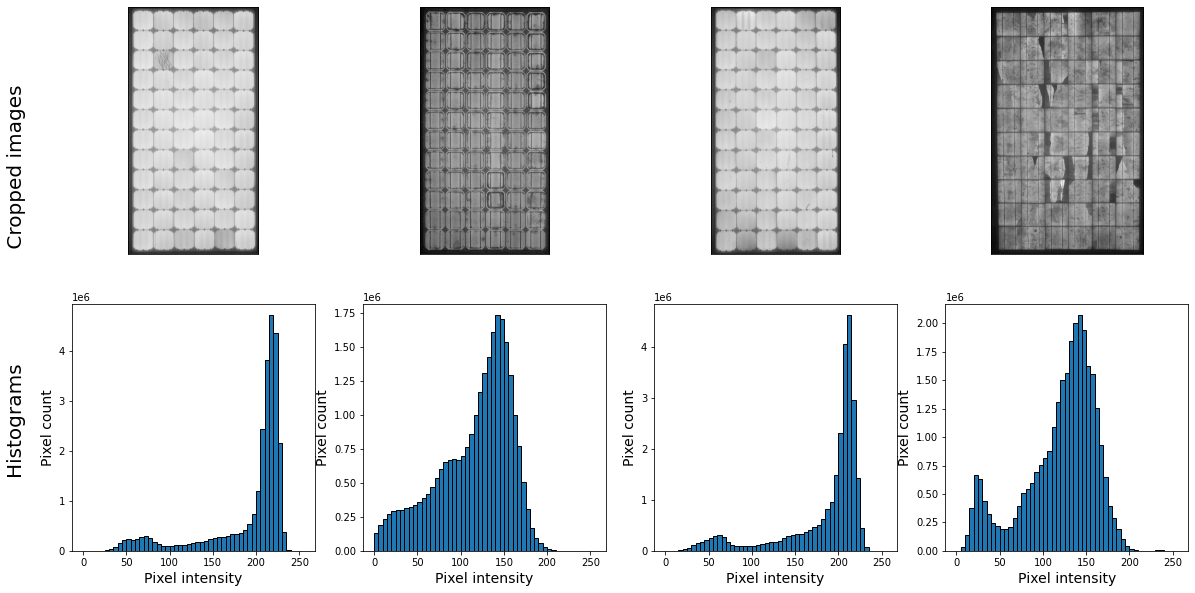

In [23]:
# model_path_cells = "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_backbone_512.hdf5"
# model_path_module = "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_PV_module_256.hdf5"
# folders = ["C:/Users/chuck/OneDrive/Desktop/Honors/BT1/BT1"] #"C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060",
# toml_path = "C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel/configs/camera_config.toml"

# images = []
# for i in range(5):
#     image = random_image(folders)
#     image = fix_barrel_distortion(image, toml_path)
#     image = find_pv_module(image, model_path_module, show=False)
#     images.append(image)

num_images = len(images)
fig, ax = plt.subplots(2, num_images, figsize=(5 * num_images, 10))

# Loop through the images and plot them
for i, img in enumerate(images):
    # Plot the original image
    ax[0, i].imshow(img)
    ax[0, i].yaxis.set_tick_params(labelbottom=False, labelleft=False)
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
    # ax[0, i].set_title('Original Image')

    # Plot the histogram of pixel intensity
    ax[1, i].hist(img.ravel(), bins=51, range=(0, 255), edgecolor="black")
    # ax[1, i].yaxis.set_tick_params(labelbottom=False, labelleft=False)
    # ax[1, i].set_xticks([])
    # ax[1, i].set_yticks([])
    ax[1, i].set_xlabel('Pixel intensity', fontsize=14)
    ax[1, i].set_ylabel('Pixel count', fontsize=14)

# Set the title for the row of subplots
fig.text(0.08, 0.5, 'Histograms                  Cropped images', va='center', rotation='vertical', fontsize=20)
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.2, wspace=0.2)
# Save the figure as a PNG image
plt.savefig('figure.png', dpi=600)
# Show the figure
plt.show()

True

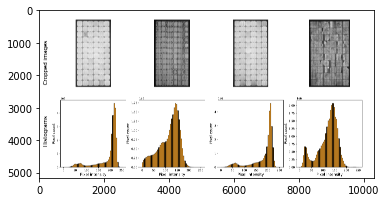

In [26]:
import cv2

# Read the original image
image = cv2.imread('figure.png')

# Get the dimensions of the original image
height, width = image.shape[:2]

# Calculate the crop region
crop_percent = 7
crop_top = int(height * crop_percent / 100)
crop_bottom = int(height * (100 - crop_percent) / 100)
crop_left = int(width * crop_percent / 100)
crop_right = int(width * (100 - crop_percent) / 100)

# Crop the image
cropped_image = image[crop_top:crop_bottom, crop_left:crop_right]
plt.imshow(cropped_image)
# Save the cropped image
cv2.imwrite('cropped_image.jpg', cropped_image)

In [4]:
image = random_image(folders)
panel_image_rows = split_module_to_cells(model_path_module, model_path_cells, image, toml_path, show=False)

['C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060', 'C:/Users/chuck/OneDrive/Desktop/Honors/BT1/BT1']
1/1 [==============================] - 0s 337ms/step


[]


C:\Users\chuck\AppData\Local\Temp\ipykernel_17988\2375700828.py:2: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(panel_image_rows[3][4])


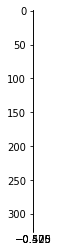

In [14]:
print(panel_image_rows[3][4])
plt.imshow(panel_image_rows[3][4])